In [19]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### Question - 1

256


Text(0.5, 1.0, 'Transformed Image')

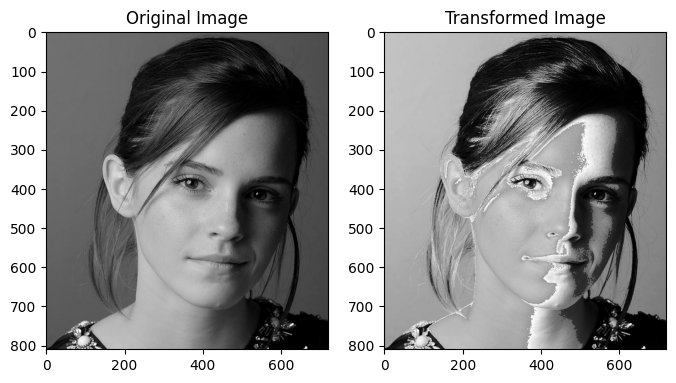

In [21]:
im1 = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

t1 = np.linspace(0, 50, 51).astype('uint8')
t2 = np.linspace(101, 255, 100).astype('uint8')
t3 = np.linspace(151, 255, 105).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

im_transformed = cv.LUT(im1, transform)

fig, ax = plt.subplots(1, 2, figsize=(8,8))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(im_transformed, cv.COLOR_BGR2RGB))
ax[1].set_title('Transformed Image')

### Question - 2

#### 2.1 White matter

256


(0.0, 255.0)

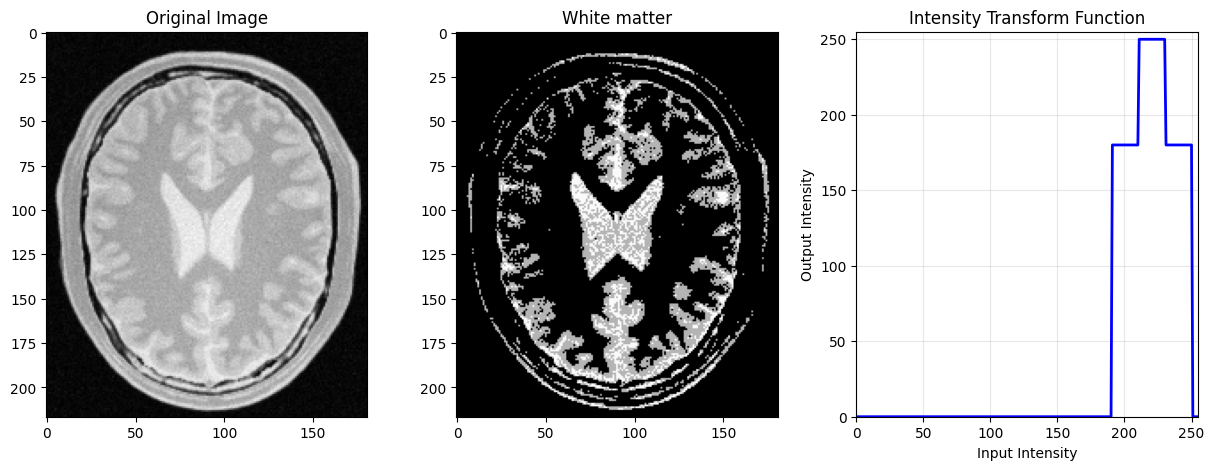

In [22]:
im2 = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

cp1 = 190
cp2 = 210
cp3 = 230
cp4 = 250
w1 = np.linspace(0, 0, cp1+1).astype('uint8')
w2 = np.linspace(180, 180, cp2-cp1).astype('uint8')
w3 = np.linspace(250, 250, cp3-cp2).astype('uint8')
w4 = np.linspace(180, 180, cp4-cp3).astype('uint8')
w5 = np.linspace(0, 0, 255-cp4).astype('uint8')

transform = np.concatenate((w1, w2), axis=0).astype('uint8')
transform = np.concatenate((transform, w3), axis=0).astype('uint8')
transform = np.concatenate((transform, w4), axis=0).astype('uint8')
transform = np.concatenate((transform, w5), axis=0).astype('uint8')
print(len(transform))

im_transformed = cv.LUT(im2, transform)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(im_transformed, cv.COLOR_BGR2RGB))
ax[1].set_title('White matter')
input_values = np.arange(len(transform))
ax[2].plot(input_values, transform, 'b-', linewidth=2, label='Transform Function')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_title('Intensity Transform Function')
ax[2].grid(True, alpha=0.3)
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)

#### 2.2 Gray matter

256


(0.0, 255.0)

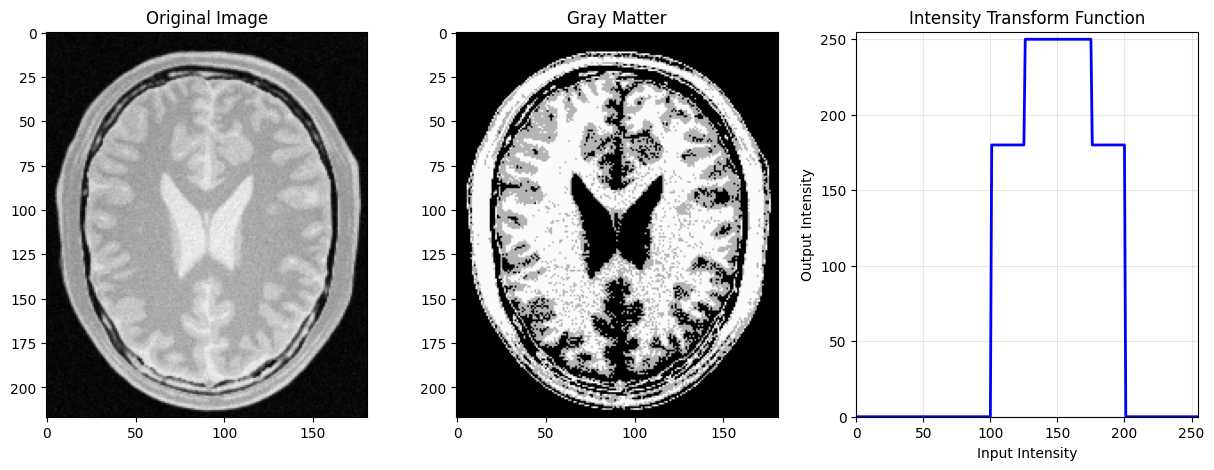

In [23]:
im2 = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

cp5 = 100
cp6 = 125
cp7 = 175
cp8 = 200
g1 = np.linspace(0, 0, cp5+1).astype('uint8')
g2 = np.linspace(180, 180, cp6-cp5).astype('uint8')
g3 = np.linspace(250, 250, cp7-cp6).astype('uint8')
g4 = np.linspace(180, 180, cp8-cp7).astype('uint8')
g5 = np.linspace(0, 0, 255-cp8).astype('uint8')

transform = np.concatenate((g1, g2), axis=0).astype('uint8')
transform = np.concatenate((transform, g3), axis=0).astype('uint8')
transform = np.concatenate((transform, g4), axis=0).astype('uint8')
transform = np.concatenate((transform, g5), axis=0).astype('uint8')
print(len(transform))

im_transformed = cv.LUT(im2, transform)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(im_transformed, cv.COLOR_BGR2RGB))
ax[1].set_title('Gray Matter')
input_values = np.arange(len(transform))
ax[2].plot(input_values, transform, 'b-', linewidth=2, label='Transform Function')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_title('Intensity Transform Function')
ax[2].grid(True, alpha=0.3)
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)

### Question - 3

Text(0.5, 1.0, 'Transformed Image (gamma = 2)')

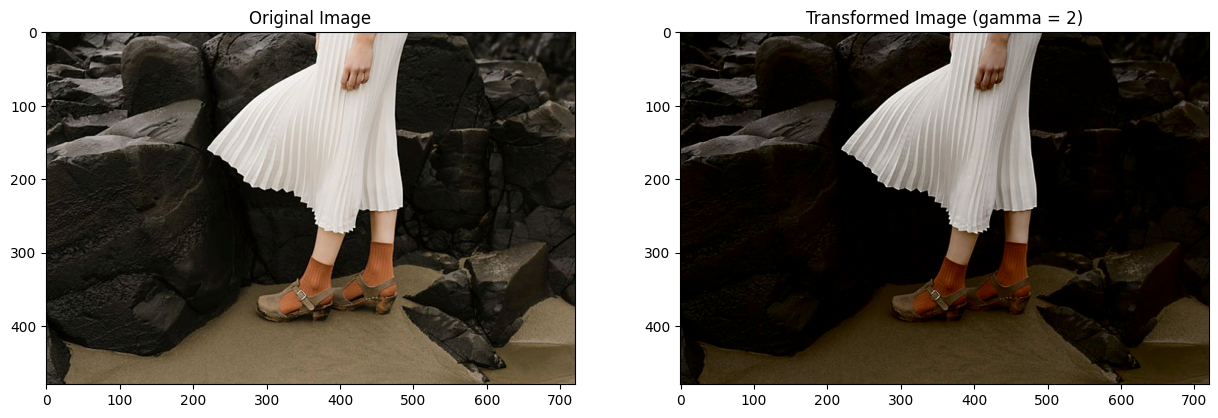

In [33]:
im3 = cv.imread('a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)
im3_lab = cv.cvtColor(im3, cv.COLOR_BGR2LAB)

L, a, b = cv.split(im3_lab)

gamma = 2
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype('uint8')
L_corrected = cv.LUT(L, t)

im3_corrected_lab = cv.merge([L_corrected, a, b])

im3_rgb = cv.cvtColor(im3_lab, cv.COLOR_LAB2RGB)
im3_corrected_rgb = cv.cvtColor(im3_corrected_lab, cv.COLOR_LAB2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(im3_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(im3_corrected_rgb)
ax[1].set_title(f'Transformed Image (gamma = {gamma})')

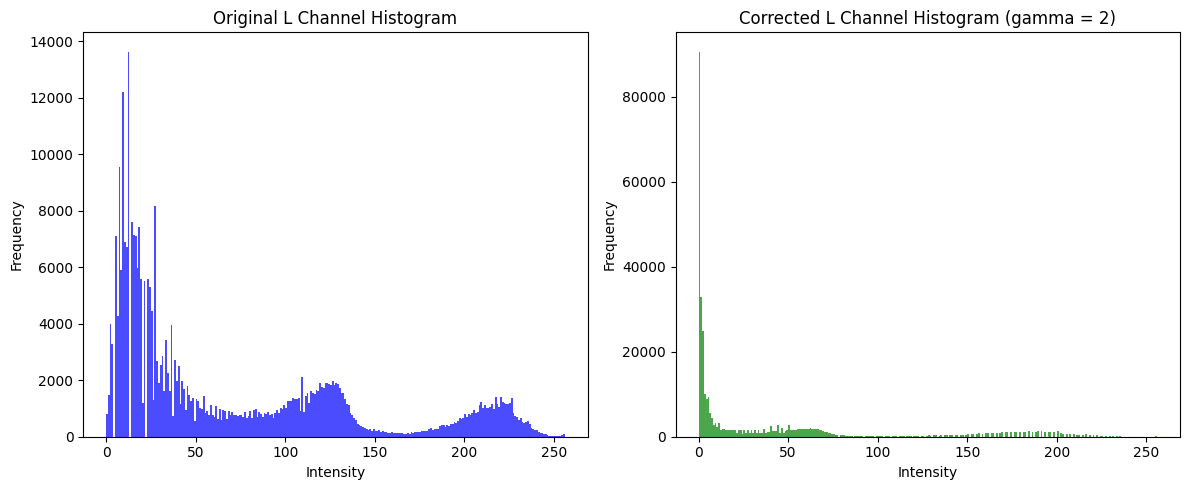

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].hist(L.ravel(), bins=256, range=[0,256], color='blue', alpha=0.7)
ax[0].set_title('Original L Channel Histogram')
ax[0].set_xlabel('Intensity')
ax[0].set_ylabel('Frequency')

ax[1].hist(L_corrected.ravel(), bins=256, range=[0,256], color='green', alpha=0.7)
ax[1].set_title(f'Corrected L Channel Histogram (gamma = {gamma})')
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()